<a href="https://colab.research.google.com/github/Azrarag/apartment-price-predection/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import random
from math import *
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def MatrixA(xi,m):
    n=len(xi)-1
    A=np.zeros((n+1,m+1))
    for i in range(n+1):
        for j in range(m+1):
            A[i,j]=xi[i]**j
    return A

In [5]:
def horner(p,x):
    n=len(p)-1
    b=p[n]
    
    for k in range(n-1,-1,-1):
        b=p[k]+b*x
    return b

In [6]:
def coeffRegression(xi,yi,m):
    #remplissage de la matrice A
    A=MatrixA(xi,m)
    b=yi
   # At=np.transpose(A)
    At=A.T
    B=At@A
    #B=np.matmul(At,b)
    C=At@b
    w=np.linalg.solve(B,C)
    #a=la.solve(B,C)
    #y=horner(a,x)
    return w

In [7]:
def polyRegression(w,x):
    y=horner(w,x)
    return y

In [8]:
#les parisiens ont noté les arondissements, on a le dictionnaire suivant:
#NoteArrondissement={"Arrondissement":Note sur 100,....,"Arrondissementn":Note sur 100}

NoteArrondissement={"6":76,"12":73.3,"15":59.1,"16":76,"17":65.3,"19":59.8}

#NoteArrondissement=np.array[[6,76],[12,73.3],[15,58.1],[16,76],[17,65.3],[19,59.8]]

surface=[67,26,118,163,87,14,45,54,75,26,38,85,73,66,64,113,18,23,8]

Nbpieces=[3,1,3,5,4,1,2,3,4,2,2,3,3,3,3,4,1,1,1]

arrondissement=[17,17,12,6,19,12,15,19,16,12,12,16,17,15,15,16,12,15,12]

etage=[5,5,3,4,5,5,1,3,4,4,7,8,2,1,2,8,3,3,7]

prix=[770,321,1300,2890,678,240,460,480,965,315,430,1038,815,730,748,1595,219,295,99]

print(len(surface),len(Nbpieces),len(arrondissement),len(etage),len(prix))

surface1=[34,53,18,59,40,66,36,78,80]
Nbpiece1=[2,2,1,3,2,3,1,4,4]
arrondissement1=[15,15,17,19,17,12,15,16,15]
etage1=[7,1,5,3,3,4,6,3,10]
prix1=[330,737,147,570,420,675,417,1090,935]

surface.extend(surface1)
Nbpieces.extend(Nbpiece1)
arrondissement.extend(arrondissement1)
etage.extend(etage1)
prix.extend(prix1)

19 19 19 19 19


In [9]:
#visualiser les données sous forme d'un tableau en utilisant la bibliotheque Pandas
data={"Surface (en m2)":surface,"Nbpieces":Nbpieces,"Arrondissement":arrondissement,"Etage":etage,"Prix en (k$)":prix}
data_pandas=pd.DataFrame(data)
display(data_pandas)

,Surface (en m2),Nbpieces,Arrondissement,Etage,Prix en (k$)
0,67,3,17,5,770
1,26,1,17,5,321
2,118,3,12,3,1300
3,163,5,6,4,2890
4,87,4,19,5,678
5,14,1,12,5,240
6,45,2,15,1,460
7,54,3,19,3,480
8,75,4,16,4,965
9,26,2,12,4,315


In [10]:
surface=np.array(surface)
Nbpieces=np.array(Nbpieces)
arrondissement=np.array(arrondissement)
etage=np.array(etage)
prix=np.array(prix)

In [11]:
def fonctCaract(Arrond,etage,NbPieces):
    """cette fonction permet de déterminer les caracteristiques de chaque app selon la note,l'étage et le nombre de pieces """
    noteArrond=NoteArrondissement[Arrond]
    caracteristique=noteArrond/100+(8-etage)/8+NbPieces/6
    return caracteristique

In [12]:
# définir le prix de metre carré et les caractéristiques de chaque appartement 
n=len(surface)
noteArrond=np.zeros(surface.shape)
caract=np.zeros(surface.shape)
prixAuMetre2=np.zeros(surface.shape)

for i in range(n):
    Arrond=str(arrondissement[i])
    caract[i]=fonctCaract(Arrond,etage[i],Nbpieces[i])
    prixAuMetre2[i]=(prix[i]/surface[i])
    
print(prixAuMetre2)
print('//////////////////////////////////////////////////////////////////////////////////')
print(caract)

[11.49253731 12.34615385 11.01694915 17.73006135  7.79310345 17.14285714
 10.22222222  8.88888889 12.86666667 12.11538462 11.31578947 12.21176471
 11.16438356 11.06060606 11.6875     14.11504425 12.16666667 12.82608696
 12.375       9.70588235 13.90566038  8.16666667  9.66101695 10.5
 10.22727273 11.58333333 13.97435897 11.6875    ]
//////////////////////////////////////////////////////////////////////////////////
[1.528      1.19466667 1.858      2.09333333 1.63966667 1.27466667
 1.79933333 1.723      1.92666667 1.56633333 1.19133333 1.26
 1.903      1.966      1.841      1.42666667 1.52466667 1.38266667
 1.02466667 1.04933333 1.79933333 1.19466667 1.723      1.61133333
 1.733      1.00766667 2.05166667 1.00766667]


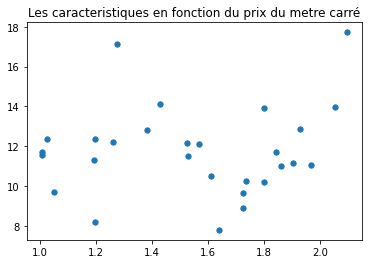

In [37]:
# Afficher le nuage de points (les caracteristiques en fonction du prix du metre carré)
xmin=1.
xmax=2.

xi=np.zeros(caract.shape)
yi=np.zeros(caract.shape)

xi=caract
yi=prixAuMetre2
plt.title('Les caracteristiques en fonction du prix du metre carré')
figure=plt.scatter(xi,yi,s=n,alpha=1,cmap='viridis')


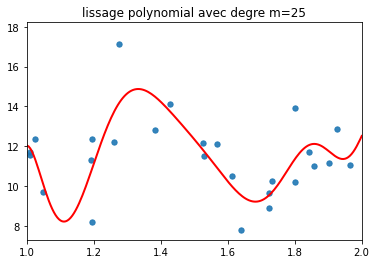

In [25]:
x=np.linspace(xmin,xmax,200)

m=25 #degre du polynome de lissage 
coef = coeffRegression(xi,yi,m)
yp=[polyRegression(coef,t) for t in x]

plt.plot(x,yp,'r',label='polylissage',linewidth=2)
plt.scatter(xi,yi,s=n,alpha=0.9,cmap='viridis')
plt.title('lissage polynomial avec degre m=%i' %m)
plt.xlim(xmin,xmax)


plt.show() # affiche la figure a l'ecran

In [29]:
def EstimationDuPrix(Arrond,Surf,eta,nmpiece,prixVente):
    """cette fonction permet d'estimer le prix de chaque appartement et calculer l'écart entre le prix estimé et le prix réel (l'erreur)"""
    prixVenteM2=prixVente/Surf
    c = fonctCaract(Arrond,eta,nmpiece)
    pr_approM2 = polyRegression(coef,c)
    prixVenteEstime = pr_approM2*surf*1000
    prixVenteEstime = np.fix(prixVenteEstime)
    print('le prix de l appartement est estimé à ', prixVenteEstime,'euro' )
    erreur=np.fix(abs((prixVente*1000-prixVenteEstime))/(prixVente*10))
    print("erreur = ",erreur,'%')

In [30]:
#test
class appartement :
    
        
    """ un appartement est caractérisé par :
    -arrondissement : la qualité du quartier
    -Sa superficie : surface 
    etage
    nmre pieces
    prix
    """
    def __init__(self,A,S,E,NP,PV):
        self.A=A
        self.S=S
        self.E=E
        self.NP=NP
        self.PV=PV
    
    def arrondissement(self):
        return self.A
    
    def superficie(self):
        return self.S
    
    def etage(self):
        return self.E
    
    def nbrepiece(self):
        return self.NP
    
    def prix(self):
        return self.PV
        
#les données de test:      
part1=appartement("17",19,5,1,242)
part2=appartement("19",80,6,5,795)
part3=appartement("6",30,2,1,355)
part4=appartement("12",57,4,3,570)
part5=appartement("12",36,4,2,435)
part6=appartement("12",228,4,2,2390)
part7=appartement("17",56,4,3,735)
part8=appartement("12",92,8,4,1060)

LesAppartements=[part1,part2,part3,part4,part5,part6,part7,part8]

numappart = 1 
for appart in LesAppartements:
    arrond=appart.arrondissement()
    surf=appart.superficie()
    eta=appart.etage()
    nmpiece=appart.nbrepiece()
    prixVente=appart.prix()
    
    print('---- Estimation du prix de : Appart%2s  -----------\n' %numappart)
    EstimationDuPrix(arrond,surf,eta,nmpiece,prixVente)
    PV = prixVente*1000
    print('\n Prix de vente demandé = %9.2f\n' %PV)
    print('-------------------------------------\n')
    numappart+=1

---- Estimation du prix de : Appart 1  -----------

le prix de l appartement est estimé à  206624.0 euro
erreur =  14.0 %

 Prix de vente demandé = 242000.00

-------------------------------------

---- Estimation du prix de : Appart 2  -----------

le prix de l appartement est estimé à  737101.0 euro
erreur =  7.0 %

 Prix de vente demandé = 795000.00

-------------------------------------

---- Estimation du prix de : Appart 3  -----------

le prix de l appartement est estimé à  276597.0 euro
erreur =  22.0 %

 Prix de vente demandé = 355000.00

-------------------------------------

---- Estimation du prix de : Appart 4  -----------

le prix de l appartement est estimé à  553263.0 euro
erreur =  2.0 %

 Prix de vente demandé = 570000.00

-------------------------------------

---- Estimation du prix de : Appart 5  -----------

le prix de l appartement est estimé à  394061.0 euro
erreur =  9.0 %

 Prix de vente demandé = 435000.00

-------------------------------------

---- Estimati